In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from collections import OrderedDict
plt.rcParams['figure.figsize'] = (15, 8)
import warnings
warnings.filterwarnings("ignore")

In [17]:
from monte_carlo import monte_carlo

In [18]:
mc = monte_carlo(range_=True, distributions=['normal', 'uniform', 'normal'], poro=[0.013, 0.214], 
    init_oil_sat=[0.46, 0.99], oil_density=[0.776, 0.782])

In [19]:
mc.generate()

Generated: 10000 of data for 3 elements


{'poro': array([0.10831499, 0.16978321, 0.1258659 , ..., 0.08783507, 0.0623769 ,
        0.18401077]),
 'init_oil_sat': array([0.53278232, 0.7554013 , 0.78039974, ..., 0.78429765, 0.53718359,
        0.57958859]),
 'oil_density': array([0.77927877, 0.77842557, 0.77993891, ..., 0.77998734, 0.7791155 ,
        0.78030841])}

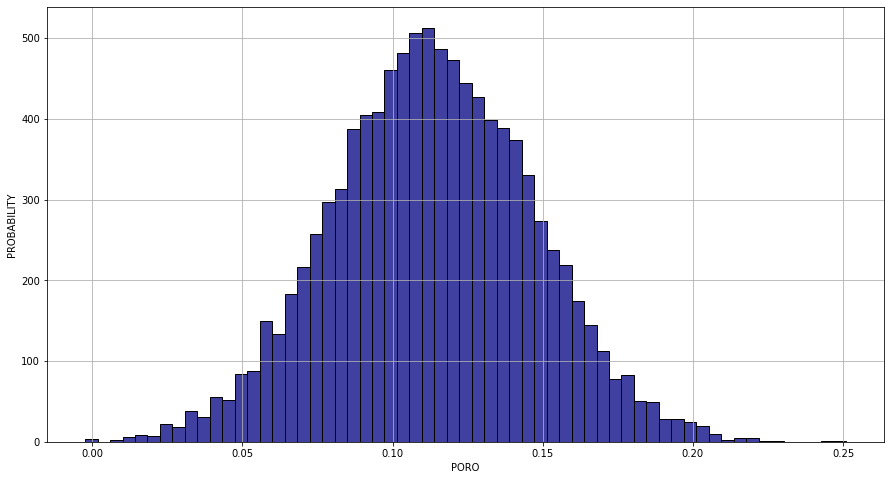

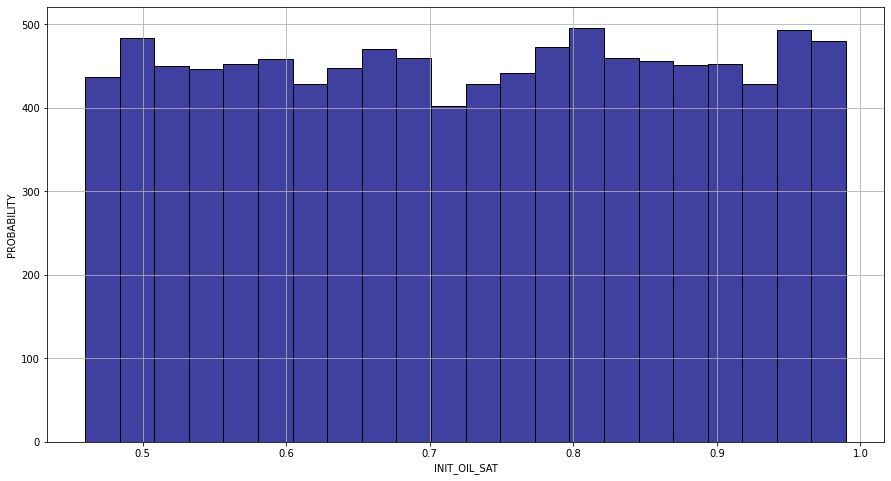

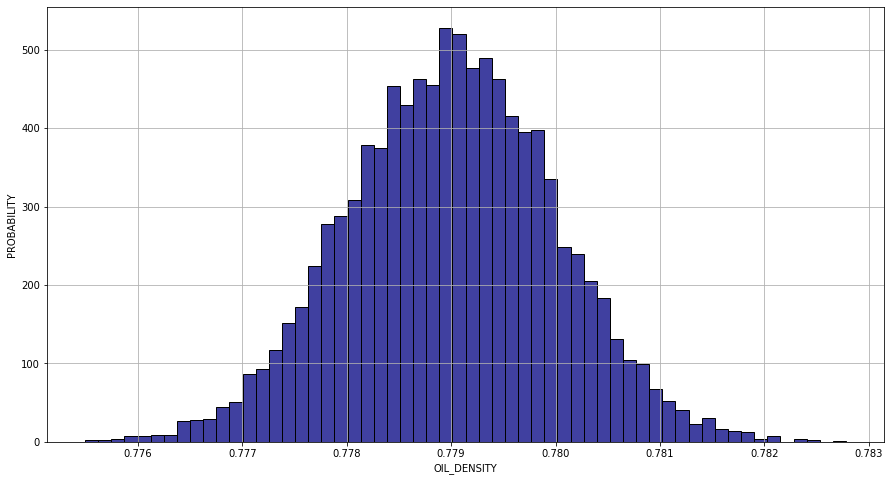

In [20]:
mc.plot_outputs()

In [21]:
teta = 1/1.086                          # Shrinkage ratio
mean_oil_area = 30828000                # Oil productive area
mean_oil_height = 19                    # Mean oil net pay

In [22]:
reserves = mc.gen_data['poro'] * mc.gen_data['init_oil_sat'] * mc.gen_data['oil_density'] * teta * mean_oil_area * mean_oil_height

### Reserves distribution

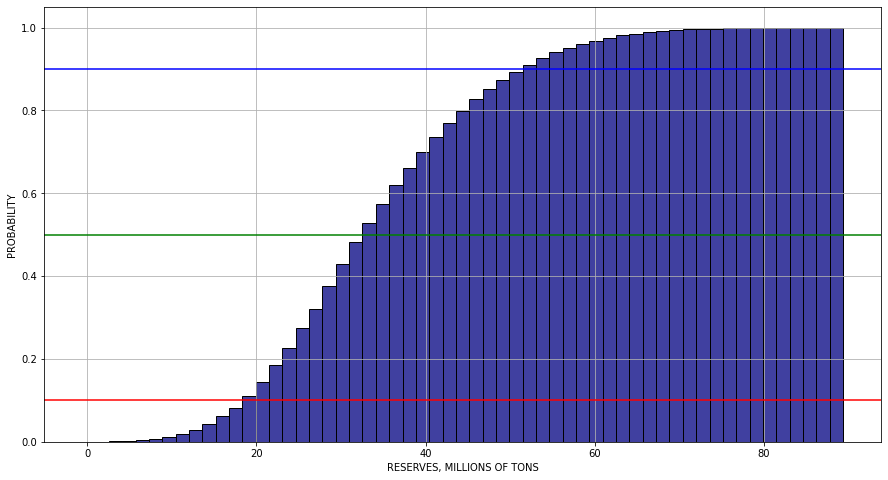

In [23]:
plt.figure(figsize=(15, 8));
sns.histplot(reserves/1000000, stat='probability', cumulative=True, color='navy', legend=False)
plt.axhline(0.9, c='b')
plt.axhline(0.5, c='g')
plt.axhline(0.1, c='r')
plt.xlabel('RESERVES, MILLIONS OF TONS')
plt.ylabel('PROBABILITY')
plt.grid()